![](images/vaccine-6116391_1920_pixabay.jpg)

# **COVID-19 Vaccination Progress EDA**

***
***

# Table of Contents

1. INTRODUCTION

    *1.1 COVID-19 pandemic*
    
    *1.2 COVID-19 vaccines*
    
    *1.3 Key objective*
    
    *1.4 Dataset overview*

2. IMPORTS AND DATA PREPARATION

    *2.1 Importing libraries and data*

    *2.2 Preliminary data exploration and subsequent cleaning*

    *2.3 Feature engineering to prepare for in-depth data analysis*

3. IN-DEPTH DATA ANALYSIS AND VISUALISATION

    *3.1 Distributions of .... (abs and %)*
    
    *3.2 Time-course of...*
    
    *3.3 TIme-series analysis of...*

***
***

## 1.4 Dataset Overview

**The dataset contains 8079 observations for 15 features.**

| FEATURE | description | comment |
|----|----|----|
| **country** | 151 countries | some duplicates |
| **iso_code** | country code by ISO norm | -|
| **date** | data entry (13th December 2020 to 24th March 2021) | - |
| **vaccines** | name/company | - |
| **daily_vaccinations** | no. of vaccination for that date/country | some days only daily vaccinations, some days only the (cummulative) total |
| **daily_vaccinations_raw** | daily vaccinations as CHANGE COMPARED TO PREVIOUS DAY (sanity check) | - |
| **daily_vaccinations_per_million** | ratio (in ppm) between vaccination number and total population for the current date in the country | - |
| **total_vaccinations** | absolute number of total immunizations in the country | some days only daily vaccinations, some days only the (cummulative) total |
| **total_vaccinations_per_hundred** | ratio (in percent) between vaccination number and total population up to the date in the country | - |
| **people_vaccinated** | total no. of people with immunisation (partial and full) | - |
| **people_vaccinated_per_hundred** | ratio (in percent) between population immunized (partial and full) and total population | - |
| **people_fully_vaccinated** | total no. of people with full immunisation (typically 2) | - |
| **people_fully_vaccinated_per_hundred** | ratio (in percent) between population fully immunized and total population | - |
| **source_name** | national authority, international organization, local organization etc. | - |
| **source_website** | website link | - |

# Introduction

-Vaccinaction: Version 81

-Tweets: Version 43

## Track the progress of COVID-19 vaccination

Was muss für ordentliches Mark up gemacht werden?

-What vaccines are used and in which countries?

-What country is vaccinated more people?

-What country is vaccinated a larger percent from its population?


## Tweets
### Perform sentiment analysis on the tweets looking to things like:

- Sentiment polarity (Negative/Positive/Neutral) in relationship with each vaccine (looking to the association with the vaccine name, as found in tweets);
Evolution of sentiment in time;

Expected:
Data analysis;
Method for sentiment analysis;
Results;
Comments and conclusions.

## Covid-19 vaccination progress:
Content
The data contains the following information:

- Country- this is the country for which the vaccination information is provided;

- Country ISO Code - ISO code for the country;

- Date - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;

- Total number of vaccinations - this is the absolute number of total immunizations in the country;

- Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;

- Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
- Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country (daily_vaccinations_raw: daily change in the total number of doses administered. It is only calculated for consecutive days. This is a raw measure provided for data checks and transparency, but we strongly recommend that any analysis on daily vaccination rates be conducted using daily_vaccinations instead);
- Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
- Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;
- Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;
- Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
- Number of vaccinations per day - number of daily vaccination for that day and country;
- Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;
- Vaccines used in the country - total number of vaccines used in the country (up to date);
- Source name - source of the information (national authority, international organization, local organization etc.);
- Source website - website of the source of information;


In [229]:
#common imports:
import numpy as np
import pandas as pd
from datetime import datetime
import os
import matplotlib.dates as md

#import for visualization
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
#for Worldmap
#import shapefile as shp


#for timeseries:
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.ndimage import gaussian_filter


#from wordcloud import WordCloud
from pandas_profiling import ProfileReport

sns.set(rc={'figure.figsize':(20,15)})


#suppress pandas future warnings:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## First Data overview

In [166]:
#import dataset country_vaccinations:
df = pd.read_csv('data/country_vaccinations.csv')

In [167]:
#first check:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [168]:
df.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
8074,Zimbabwe,ZWE,2021-03-20,42210.0,42210.0,NaN,523.0,836.0,0.28,0.28,NaN,56.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...
8075,Zimbabwe,ZWE,2021-03-21,42729.0,42729.0,NaN,519.0,910.0,0.29,0.29,NaN,61.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...
8076,Zimbabwe,ZWE,2021-03-22,43294.0,43294.0,NaN,565.0,805.0,0.29,0.29,NaN,54.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...
8077,Zimbabwe,ZWE,2021-03-23,44135.0,44135.0,NaN,841.0,655.0,0.30,0.30,NaN,44.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...
8078,Zimbabwe,ZWE,2021-03-24,49404.0,49404.0,NaN,5269.0,1400.0,0.33,0.33,NaN,94.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...


Cleaning tasks:
- First check of data shows a lot missing values. 

In [169]:
#Number of columns and rows:
shape1 = df.shape
print(f'We have {shape1[1]} columns and {shape1[0]} rows in our dataset.')

We have 15 columns and 8079 rows in our dataset.


In [170]:
#Information about datatypes per column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              8079 non-null   object 
 1   iso_code                             8079 non-null   object 
 2   date                                 8079 non-null   object 
 3   total_vaccinations                   4984 non-null   float64
 4   people_vaccinated                    4423 non-null   float64
 5   people_fully_vaccinated              3021 non-null   float64
 6   daily_vaccinations_raw               4192 non-null   float64
 7   daily_vaccinations                   7891 non-null   float64
 8   total_vaccinations_per_hundred       4984 non-null   float64
 9   people_vaccinated_per_hundred        4423 non-null   float64
 10  people_fully_vaccinated_per_hundred  3021 non-null   float64
 11  daily_vaccinations_per_million

Cleaning task: 
- change object to datetime for column date
- Check missing values in all columns with rows less than 8079

In [171]:
df.nunique()

country                                 151
iso_code                                151
date                                    102
total_vaccinations                     4784
people_vaccinated                      4253
people_fully_vaccinated                2880
daily_vaccinations_raw                 3868
daily_vaccinations                     5563
total_vaccinations_per_hundred         1955
people_vaccinated_per_hundred          1663
people_fully_vaccinated_per_hundred     818
daily_vaccinations_per_million         3698
vaccines                                 26
source_name                              92
source_website                          147
dtype: int64

In [172]:
#basic statistic
df.describe().transpose().round()

,count,mean,std,min,25%,50%,75%,max
total_vaccinations,4984.0,2597915.0,9383280.0,0.0,40452.0,276962.0,1303350.0,130473853.0
people_vaccinated,4423.0,2073454.0,6824277.0,0.0,36780.0,249555.0,1007708.0,85472166.0
people_fully_vaccinated,3021.0,893378.0,3595095.0,1.0,19019.0,111716.0,488937.0,46365515.0
daily_vaccinations_raw,4192.0,92034.0,289560.0,0.0,2738.0,13838.0,56702.0,4575496.0
daily_vaccinations,7891.0,60968.0,213914.0,1.0,1026.0,6161.0,27794.0,2541597.0
total_vaccinations_per_hundred,4984.0,10.0,18.0,0.0,1.0,4.0,11.0,162.0
people_vaccinated_per_hundred,4423.0,8.0,12.0,0.0,1.0,3.0,9.0,90.0
people_fully_vaccinated_per_hundred,3021.0,4.0,8.0,0.0,0.0,2.0,3.0,72.0
daily_vaccinations_per_million,7891.0,2699.0,4163.0,0.0,363.0,1305.0,3211.0,54264.0


## Data cleaning

In [173]:
#check for missing values
missing_values = pd.DataFrame(df.isnull().sum(), columns=['ID'])
missing_values

,ID
country,0
iso_code,0
date,0
total_vaccinations,3095
people_vaccinated,3656
people_fully_vaccinated,5058
daily_vaccinations_raw,3887
daily_vaccinations,188
total_vaccinations_per_hundred,3095
people_vaccinated_per_hundred,3656


In [174]:
#check for missing values in %
round(100*(df.isnull().sum()/len(df.index)),0)

country                                 0.0
iso_code                                0.0
date                                    0.0
total_vaccinations                     38.0
people_vaccinated                      45.0
people_fully_vaccinated                63.0
daily_vaccinations_raw                 48.0
daily_vaccinations                      2.0
total_vaccinations_per_hundred         38.0
people_vaccinated_per_hundred          45.0
people_fully_vaccinated_per_hundred    63.0
daily_vaccinations_per_million          2.0
vaccines                                0.0
source_name                             0.0
source_website                          0.0
dtype: float64

We have a high percentage of missing values in the vaccine columns.

In [175]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


Data cleaning tasks:
- countries have different names (e.g. England, United Kingdom, Northern Ireland, Wales, Scotland)
- drop daily_vaccinations_raw
(set categorical data to categorical data tpye)

## Data cleaning - Nan

We have a lot of missing data and handle it as follows:

- First we drop all rows with only Nans/0.0 for all vaccination columns. In these cases only the vaccines have been reported but vaccinations started later. This correction eliminanted the 2% missing data for daily vaccinations. 

- people_fully_vaccinated/peple_fully_vaccinated_per_hundred: fill NaNs with 0 as these are missing values because no one is fully vaccinated at that time.

- For total_vaccinations 39% for the data are missing. This is surprising as values for daily_vaccinations are fully available. A comparison of total_vaccinations at 24.03.2021 and the summed up daily_vaccinations showed a big difference (e.g. for the US over 7.0 M less reported doses for daily_vaccinations as for total_vaccination. A further analysis where the data originally came from leads to the following explanation:

"New doses administered per day (7-day smoothed). For countries that don't report data on a daily basis, we assume that doses changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window."(source: Our World in Data)

- noch begründen warum wir nicht totals berechnen (weil eh schon smoothed..), aber beides nutzen (totals am 24.03 vorhanden)


In [176]:
#copy dataset before cleaning
df1 = df.copy()

In [177]:
#change type for date to datetime
df1['date'] = pd.to_datetime(df1['date'])
df1.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [178]:
#test changes to date
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              8079 non-null   object        
 1   iso_code                             8079 non-null   object        
 2   date                                 8079 non-null   datetime64[ns]
 3   total_vaccinations                   4984 non-null   float64       
 4   people_vaccinated                    4423 non-null   float64       
 5   people_fully_vaccinated              3021 non-null   float64       
 6   daily_vaccinations_raw               4192 non-null   float64       
 7   daily_vaccinations                   7891 non-null   float64       
 8   total_vaccinations_per_hundred       4984 non-null   float64       
 9   people_vaccinated_per_hundred        4423 non-null   float64       
 10  people_fully

In [179]:
# drop all rows with NaNs in 'people_fully_vaccinated', 'daily_vaccinations', 'daily_vaccinations_per_million':
df1.dropna(subset = ['people_fully_vaccinated', 'daily_vaccinations', 'daily_vaccinations_per_million'], axis = 0, how = 'all', inplace = True)


In [180]:
#Fill all NaNs for people fully vaccinated and people fully vaccinated per hundred with 0:
df1['people_fully_vaccinated'] = df1['people_fully_vaccinated'].fillna(0)
df1['people_fully_vaccinated_per_hundred'] = df1['people_fully_vaccinated_per_hundred'].fillna(0)

In [181]:
#check for missing data in 
round(100*(df1.isnull().sum()/len(df1.index)),0)

country                                 0.0
iso_code                                0.0
date                                    0.0
total_vaccinations                     39.0
people_vaccinated                      46.0
people_fully_vaccinated                 0.0
daily_vaccinations_raw                 47.0
daily_vaccinations                      0.0
total_vaccinations_per_hundred         39.0
people_vaccinated_per_hundred          46.0
people_fully_vaccinated_per_hundred     0.0
daily_vaccinations_per_million          0.0
vaccines                                0.0
source_name                             0.0
source_website                          0.0
dtype: float64

In [182]:
df1_corr = df1.copy()

In [184]:
df1[df1['country']== 'Israel']

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3689,Israel,ISR,2020-12-20,7401.0,7401.0,0.0,7340.0,7340.0,0.09,0.09,0.00,848.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
3690,Israel,ISR,2020-12-21,32186.0,32186.0,0.0,24785.0,16062.0,0.37,0.37,0.00,1856.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
3691,Israel,ISR,2020-12-22,76719.0,76719.0,0.0,44533.0,25553.0,0.89,0.89,0.00,2952.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
3692,Israel,ISR,2020-12-23,139255.0,139255.0,0.0,62536.0,34798.0,1.61,1.61,0.00,4020.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
3693,Israel,ISR,2020-12-24,212498.0,212498.0,0.0,73243.0,42487.0,2.46,2.46,0.00,4909.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779,Israel,ISR,2021-03-20,9690578.0,5164750.0,4525828.0,20321.0,69574.0,111.96,59.67,52.29,8038.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
3780,Israel,ISR,2021-03-21,9742720.0,5177662.0,4565058.0,52142.0,63510.0,112.56,59.82,52.74,7337.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
3781,Israel,ISR,2021-03-22,9794269.0,5190620.0,4603649.0,51549.0,56906.0,113.16,59.97,53.19,6575.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
3782,Israel,ISR,2021-03-23,9803959.0,5193184.0,4610775.0,9690.0,45461.0,113.27,60.00,53.27,5252.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...


In [20]:
df1_corr.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1,Afghanistan,AFG,2021-02-23,NaN,NaN,0.0,NaN,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,0.0,NaN,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,0.0,NaN,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,0.0,NaN,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
5,Afghanistan,AFG,2021-02-27,NaN,NaN,0.0,NaN,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [21]:
#Check difference between total sum of daily vaccinations vs. last value of total vaccinations 
country_sum = df1[df1['country']== 'United States']
Total = country_sum['daily_vaccinations'].sum()
Total

123442260.0

In [22]:
#Calculate sum of daily vaccinations for all days per country:
new_test1 = df1.groupby(['country'])['daily_vaccinations'].sum().reset_index()
print(new_test1)

         country  daily_vaccinations
0    Afghanistan             49509.0
1        Albania             45493.0
2        Algeria             69070.0
3        Andorra              8021.0
4         Angola             74832.0
..           ...                 ...
143      Uruguay            356610.0
144    Venezuela              8704.0
145      Vietnam             35485.0
146        Wales           1583848.0
147     Zimbabwe             44611.0

[148 rows x 2 columns]


In [23]:
#Select rows only for 2021-03-24:
only_total = df1[df1.date == '2021-03-24']
only_total.groupby('country')


In [24]:
#merge test and new_test1
test_m = pd.merge(only_total, new_test1, how='inner', on=['country'])

In [25]:
#Check difference between total sum of daily vaccinations/country with total vaccinations/country:
test_m['vacc_difference'] = test_m['total_vaccinations'] - test_m['daily_vaccinations_y']
test_m.sample(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations_x,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,daily_vaccinations_y,vacc_difference
11,Canada,CAN,2021-03-24,4393876.0,3751505.0,642371.0,170604.0,140554.0,11.64,9.94,1.70,3724.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html,3981002.0,412874.0
40,Nigeria,NGA,2021-03-24,277458.0,277458.0,0.0,NaN,29940.0,0.13,0.13,0.00,145.0,Oxford/AstraZeneca,Government of Nigeria,https://twitter.com/NphcdaNG/status/1374751795...,189818.0,87640.0
43,Philippines,PHL,2021-03-24,508332.0,508332.0,0.0,NaN,39448.0,0.46,0.46,0.00,360.0,"Oxford/AstraZeneca, Sinovac",Government of the Philippines,https://newsinfo.inquirer.net/1410799/over-500...,345835.0,162497.0
18,Gibraltar,GIB,2021-03-24,54587.0,30232.0,24355.0,726.0,751.0,162.02,89.73,72.29,22291.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/137474...,55186.0,-599.0
7,Bolivia,BOL,2021-03-24,218201.0,160904.0,57297.0,20097.0,9658.0,1.87,1.38,0.49,827.0,Sputnik V,Ministry of Health,https://twitter.com/SaludDeportesBo/status/137...,179285.0,38916.0


We found a big discrepancy between total vaccinations and daily vaccinations per country. For visualization purposes we will use both but later for modelling we decided to work with daily vaccinations only because the values are completly available.

In [26]:
#df1_vacc_total_interpolated = df1.copy()
#df1_vacc_total_interpolated['total_vacc_interpolated'] = df1_vacc_total_interpolated['total_vaccinations']
#df1_vacc_total_interpolated.head()

In [27]:
#df1_vacc_total_interpolated.groupby('country').resample('total_vacc_interpolated').mean().head(4)
#df1_vacc_total_interpolated = df1_vacc_total_interpolated.groupby('country').resample('total_vacc_interpolated').mean()
#df1_vacc_total_interpolated['readvalue'] = df1_vacc_total_interpolated['readvalue'].interpolate()
#df1_vacc_total_interpolated.sample(4)

In [28]:
#check for duplicates in country and date:
df1[df1.duplicated(subset=['country','date'], keep=False)].shape

(0, 15)

In [29]:
#drop column daily_vaccinations_raw, source_name, source_website:
lst = ['daily_vaccinations_raw', 'source_name', 'source_website']
df1.drop(lst, 1, inplace=True)
df1.head(3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
1,Afghanistan,AFG,2021-02-23,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca
2,Afghanistan,AFG,2021-02-24,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca
3,Afghanistan,AFG,2021-02-25,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca


In [30]:
df1 = df1[df1.country.apply(lambda x: x not in ['England', 'Scotland', 'Wales', 'Northern Ireland'])]

In [31]:
lst2 = ['England', 'Scotland', 'Wales', 'Northern Ireland']
check1 = df1.loc[df['country'].isin(lst2)].loc[df1['date'] == '2021-03-15'].loc[:, 'daily_vaccinations'].sum()
check2 = df1.loc[df['country'] == 'United Kingdom'].loc[df1['date'] == '2021-03-15'].loc[:, 'daily_vaccinations'].values[0]
print(f'The sum of daily vaccinations in England, Scotland, Wales and Nothern Ireland on 15th March 2021 was: {check1}')
print(f'The total daily vaccinations in the United Kingdom on 15th March 2021 was: {check2}')

The sum of daily vaccinations in England, Scotland, Wales and Nothern Ireland on 15th March 2021 was: 0.0
The total daily vaccinations in the United Kingdom on 15th March 2021 was: 389942.0


In [32]:
lst_empties = ['', []]
df.vaccines.isin(lst_empties).value_counts()

False    8079
Name: vaccines, dtype: int64

In [33]:
#Basic profile
#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#profile

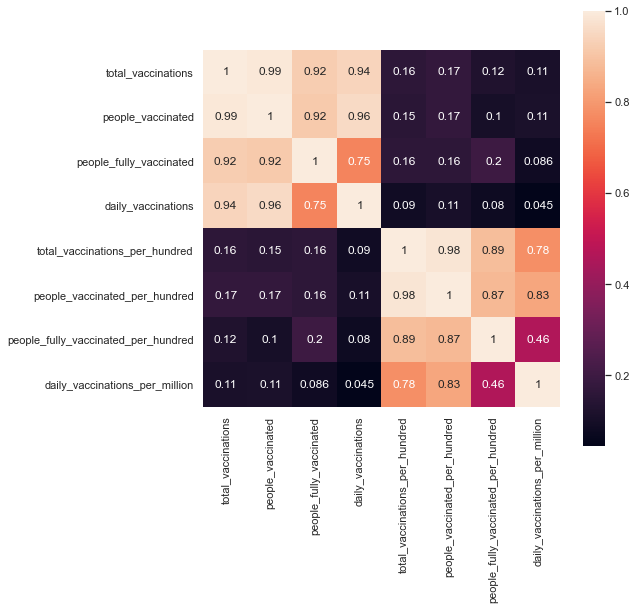

In [34]:
#heatmap for correlation of data:
plt.subplots(figsize=(8, 8))
sns.heatmap(df1.corr() , annot=True, square=True )
plt.show()

In [35]:
#check correlation of data
#sns.pairplot(data=df1);

## Feature Engineering

In [36]:
#df1['vaccines'].unique()

In [37]:

df2 = df1.drop('vaccines', axis=1).join(df['vaccines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('vaccines'))
df3 = df2[['country', 'date', 'vaccines']]
df3.head()

,country,date,vaccines
1,Afghanistan,2021-02-23,Oxford/AstraZeneca
2,Afghanistan,2021-02-24,Oxford/AstraZeneca
3,Afghanistan,2021-02-25,Oxford/AstraZeneca
4,Afghanistan,2021-02-26,Oxford/AstraZeneca
5,Afghanistan,2021-02-27,Oxford/AstraZeneca


In [38]:
df4 = df3.pivot(index=['country', 'date'], columns='vaccines', values='vaccines').reset_index()
df4.sample(5)

vaccines,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,Sputnik V
2813,Greenland,2021-02-06,NaN,NaN,NaN,NaN,NaN,Pfizer/BioNTech,NaN,NaN,NaN,NaN
2073,Dominica,2021-02-28,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,NaN,NaN
4920,Nepal,2021-03-09,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,NaN,NaN
198,Anguilla,2021-02-20,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,NaN,NaN
2405,Finland,2021-02-02,NaN,NaN,NaN,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,NaN,NaN,NaN,NaN


In [39]:
lst_ = ['country', 'date', 'vaccines']
df1.drop(lst_, 1, inplace=True)
df1.head(3)

,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
1,AFG,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0
2,AFG,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0
3,AFG,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0


In [40]:
df5 = df4.join(df1)
df5.head(3)

,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,...,Sputnik V,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,...,NaN,AFG,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0
2,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,...,NaN,AFG,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0


In [41]:
#Change NaN in vaccine columns to 0:
df5['Covaxin'] = df5['Covaxin'].fillna(0)
df5['EpiVacCorona'] = df5['EpiVacCorona'].fillna(0)
df5['Johnson&Johnson'] = df5['Johnson&Johnson'].fillna(0)
df5['Moderna'] = df5['Moderna'].fillna(0)
df5['Oxford/AstraZeneca'] = df5['Oxford/AstraZeneca'].fillna(0)
df5['Pfizer/BioNTech'] = df5['Pfizer/BioNTech'].fillna(0)
df5['Sinopharm/Beijing'] = df5['Sinopharm/Beijing'].fillna(0)
df5['Sinopharm/Wuhan'] = df5['Sinopharm/Wuhan'].fillna(0)
df5['Sinovac'] = df5['Sinovac'].fillna(0)
df5['Sputnik V'] = df5['Sputnik V'].fillna(0)

In [42]:
#vaccine_repl(df5)
df5.sample(5)

,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,...,Sputnik V,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
5735,Romania,2021-01-18,0,0,0,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,0,0,...,0,PER,272755.0,272755.0,0.0,20036.0,0.83,0.83,0.00,608.0
6992,Turkey,2021-02-12,0,0,0,0,0,0,0,0,...,0,SVN,260486.0,175948.0,84538.0,7256.0,12.53,8.46,4.07,3490.0
715,Belarus,2021-01-08,0,0,0,0,0,0,0,0,...,Sputnik V,BRB,49393.0,49393.0,0.0,1181.0,17.19,17.19,0.00,4110.0
1283,Canada,2021-02-27,0,0,0,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,0,0,...,0,CAN,801238.0,718481.0,82757.0,36850.0,2.12,1.90,0.22,976.0
6005,Saint Lucia,2021-02-23,0,0,0,0,Oxford/AstraZeneca,0,0,0,...,0,QAT,NaN,NaN,0.0,3867.0,NaN,NaN,0.00,1342.0


In [43]:
#Change vaccine names to 1:
df5['Covaxin'] = df5['Covaxin'].replace(['Covaxin'],1)
df5['EpiVacCorona'] = df5['EpiVacCorona'].replace(['EpiVacCorona'],1)
df5['Johnson&Johnson'] = df5['Johnson&Johnson'].replace(['Johnson&Johnson'],1)
df5['Moderna'] = df5['Moderna'].replace(['Moderna'],1)
df5['Oxford/AstraZeneca'] = df5['Oxford/AstraZeneca'].replace(['Oxford/AstraZeneca'],1)

df5['Pfizer/BioNTech'] = df5['Pfizer/BioNTech'].replace(['Pfizer/BioNTech'],1)
df5['Sinopharm/Beijing'] = df5['Sinopharm/Beijing'].replace(['Sinopharm/Beijing'],1)
df5['Sinopharm/Wuhan'] = df5['Sinopharm/Wuhan'].replace(['Sinopharm/Wuhan'],1)
df5['Sinovac'] = df5['Sinovac'].replace(['Sinovac'],1)
df5['Sputnik V'] = df5['Sputnik V'].replace(['Sputnik V'],1)

In [44]:
#Number of countries included in dataset:
df6 = df5.copy()
df6 = df6.set_index(['date'])
ncountry = df6['country'].nunique()
print(F'{ncountry} countries are included in the Covid-19 vaccination progress dataset.')

144 countries are included in the Covid-19 vaccination progress dataset.


In [45]:
#Create list with countries per region, create new column in df6 and map region to country:
Africa = ('Algeria','Angola','Chad', "Cote d'Ivoire",'Egypt','Equatorial Guinea','Ghana','Guinea','Kenya','Malawi','Maldives','Mali','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe', 'Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Western Sahara', 'Zambia','Zimbabwe')

Asia = ('Afghanistan','Azerbaijan','Bangladesh','Bhutan','Brunei','Cambodia','China','East Timor','Hong Kong','India','Indonesia','Japan','Kazakhstan','Kyrgyzstan','Laos','Macao','Malaysia','Maldives','Mongolia','Myanmar','Nepal','North Korea','Pakistan','Philippines','Russia','Singapore','South Korea','Sri Lanka','Taiwan','Tajikistan','Thailand','Turkmenistan','Uzbekistan','Vietnam')
    
Middle_East = ('Bahrain','Iran','Iraq','Israel','Jordan','Kuwait','Lebanon','Oman','Qatar','Saudi Arabia','Syria','Turkey','United Arab Emirates','Yemen')
   
Europe = ('Albania','Andorra','Armenia','Austria','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Faeroe Islands','Finland','France','Georgia','Germany','Greece','Greenland','Hungary','Iceland','Ireland','Italy','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','North Macedonia','Northern Cyprus','Norway','Poland','Portugal','Romania','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','Vatican City')

UK_BritishOversea= ('United Kingdom','Anguilla','Antigua and Barbuda','Bermuda','Cayman Islands','Falkland Islands','Gibraltar','Guernsey','Isle of Man','Jersey', 'Montserrat', 'Saint Helena', 'Turks and Caicos Islands')

North_America = ('Canada','United States')
Central_America_Caribic = ('Antigua and Barbuda','Bahamas','Barbados','Belize','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago')
South_America = ('Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela')
Australia_Oceania = ('Australia','Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu')


continents = {country: 'Asia' for country in Asia}
continents.update({country: 'Europe' for country in Europe})
continents.update({country: 'Africa' for country in Africa})
continents.update({country: 'Middle_East' for country in Middle_East})
continents.update({country: 'UK_BritishOversea' for country in UK_BritishOversea})
continents.update({country: 'North_America' for country in North_America})
continents.update({country: 'Central_America_Caribic' for country in Central_America_Caribic})
continents.update({country: 'South_America' for country in South_America})
continents.update({country: 'Australia_Oceania' for country in Australia_Oceania})

df6['cgrouped'] = df6['country'].map(continents)



In [46]:
#Save cleaned and feature engineered dataframes as csv files to upload to EDA Notebook:
df2.to_csv('df2.csv', encoding='utf-8', index=False)
df3.to_csv('df3.csv', encoding='utf-8', index=False)
df4.to_csv('df4.csv', encoding='utf-8', index=False)
df5.to_csv('df5.csv', encoding='utf-8', index=False)
df6.to_csv('df6.csv', encoding='utf-8', index=False)

Merge:

In [213]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15198 entries, 1 to 8078
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              15198 non-null  object        
 1   iso_code                             15198 non-null  object        
 2   date                                 15198 non-null  datetime64[ns]
 3   total_vaccinations                   10454 non-null  float64       
 4   people_vaccinated                    9372 non-null   float64       
 5   people_fully_vaccinated              15198 non-null  float64       
 6   daily_vaccinations                   15188 non-null  float64       
 7   total_vaccinations_per_hundred       10454 non-null  float64       
 8   people_vaccinated_per_hundred        9372 non-null   float64       
 9   people_fully_vaccinated_per_hundred  15198 non-null  float64       
 10  daily_vacci

In [214]:
df_owid_covid_23march_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75099 entries, 0 to 75098
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         75099 non-null  object 
 1   country                          75099 non-null  object 
 2   date                             75099 non-null  object 
 3   total_cases                      75099 non-null  float64
 4   new_cases                        75092 non-null  float64
 5   new_cases_smoothed               75099 non-null  float64
 6   total_deaths                     75099 non-null  float64
 7   new_deaths                       75099 non-null  float64
 8   new_deaths_smoothed              75099 non-null  float64
 9   total_cases_per_million          75099 non-null  float64
 10  new_cases_per_million            75092 non-null  float64
 11  new_cases_smoothed_per_million   75099 non-null  float64
 12  total_deaths_per_m

In [210]:
df_owid_covid_23march_1 = pd.read_csv('df_owid_covid_23march_1.csv')
df_owid_covid_23march_1.head()

,iso_code,country,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,new_deaths_smoothed_per_million,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Afghanistan,2020-02-24,1.0,1.0,0.0,0.0,0.0,0.0,0.026,...,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.5,64.83,0.511
1,AFG,Afghanistan,2020-02-25,1.0,0.0,0.0,0.0,0.0,0.0,0.026,...,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.5,64.83,0.511
2,AFG,Afghanistan,2020-02-26,1.0,0.0,0.0,0.0,0.0,0.0,0.026,...,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.5,64.83,0.511
3,AFG,Afghanistan,2020-02-27,1.0,0.0,0.0,0.0,0.0,0.0,0.026,...,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.5,64.83,0.511
4,AFG,Afghanistan,2020-02-28,1.0,0.0,0.0,0.0,0.0,0.0,0.026,...,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.5,64.83,0.511


In [215]:
df_owid_covid_23march_1['date'] = pd.to_datetime(df_owid_covid_23march_1['date'])

In [216]:
df_all = pd.merge(df2, df_owid_covid_23march_1, on='iso_code', how='right')

In [217]:
merge_df = pd.merge(df2, df_owid_covid_23march_1)#,left_on='date', right_on='country'

In [218]:
df_all.head()

,country_x,iso_code,date_x,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,...,new_deaths_smoothed_per_million,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Afghanistan,AFG,2021-02-23,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,...,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.5,64.83,0.511
1,Afghanistan,AFG,2021-02-24,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,...,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.5,64.83,0.511
2,Afghanistan,AFG,2021-02-25,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,...,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.5,64.83,0.511
3,Afghanistan,AFG,2021-02-26,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,...,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.5,64.83,0.511
4,Afghanistan,AFG,2021-02-27,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,...,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,0.5,64.83,0.511


In [219]:
df_all_date = df_all[['country_x', 'country_y', 'date_x', 'date_y']]
df_all_date.head()

,country_x,country_y,date_x,date_y
0,Afghanistan,Afghanistan,2021-02-23,2020-02-24
1,Afghanistan,Afghanistan,2021-02-24,2020-02-24
2,Afghanistan,Afghanistan,2021-02-25,2020-02-24
3,Afghanistan,Afghanistan,2021-02-26,2020-02-24
4,Afghanistan,Afghanistan,2021-02-27,2020-02-24


In [222]:
merge_df.sample(15)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,...,new_deaths_smoothed_per_million,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,human_development_index
1658,Bolivia,BOL,2021-02-08,NaN,NaN,0.0,1017.0,NaN,NaN,0.00,...,5.201,1.167303e+07,10.202,25.4,6.704,4.393,6885.829,1.100,71.51,0.718
5615,Hungary,HUN,2021-02-16,483751.0,348927.0,134824.0,11079.0,5.01,3.61,1.40,...,8.695,9.660350e+06,108.043,43.4,18.577,11.976,26777.561,7.020,76.88,0.854
7593,Liechtenstein,LIE,2021-03-12,NaN,NaN,0.0,83.0,NaN,NaN,0.00,...,3.746,3.813700e+04,237.012,NaN,NaN,NaN,NaN,2.397,82.49,0.919
2455,Chile,CHL,2021-01-10,10702.0,10702.0,0.0,293.0,0.06,0.06,0.00,...,2.459,1.911621e+07,24.282,35.4,11.087,6.938,22767.037,2.110,80.18,0.851
14065,Zimbabwe,ZWE,2021-03-02,25077.0,25077.0,0.0,3005.0,0.17,0.17,0.00,...,0.231,1.486293e+07,42.729,19.6,2.822,1.882,1899.775,1.700,61.49,0.571
11386,Senegal,SEN,2021-03-06,64117.0,64117.0,0.0,5495.0,0.38,0.38,0.00,...,0.350,1.674393e+07,82.328,18.7,3.008,1.796,2470.580,NaN,67.94,0.512
7722,Lithuania,LTU,2021-02-02,100992.0,74865.0,26127.0,4199.0,3.71,2.75,0.96,...,8.186,2.722291e+06,45.135,43.5,19.002,13.778,29524.265,6.560,75.93,0.882
2481,Chile,CHL,2021-01-23,65351.0,56985.0,8366.0,6169.0,0.34,0.30,0.04,...,3.131,1.911621e+07,24.282,35.4,11.087,6.938,22767.037,2.110,80.18,0.851
10837,Romania,ROU,2021-03-23,2626770.0,1799681.0,827089.0,50949.0,13.65,9.35,4.30,...,5.525,1.923768e+07,85.129,43.0,17.850,11.690,23313.199,6.892,76.05,0.828
4739,Germany,DEU,2021-01-09,620527.0,620527.0,0.0,51672.0,0.74,0.74,0.00,...,10.430,8.378394e+07,237.016,46.6,21.453,15.957,45229.245,8.000,81.33,0.947


In [231]:
merge_df[merge_df['country']== 'United States']

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,...,new_deaths_smoothed_per_million,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,human_development_index
13698,United States,USA,2020-12-21,614117.0,614117.0,0.0,57909.0,0.18,0.18,0.00,...,8.431,331002647.0,35.608,38.3,15.413,9.732,54225.446,2.77,78.86,0.926
13699,United States,USA,2020-12-21,614117.0,614117.0,0.0,57909.0,0.18,0.18,0.00,...,8.431,331002647.0,35.608,38.3,15.413,9.732,54225.446,2.77,78.86,0.926
13700,United States,USA,2020-12-21,614117.0,614117.0,0.0,57909.0,0.18,0.18,0.00,...,8.431,331002647.0,35.608,38.3,15.413,9.732,54225.446,2.77,78.86,0.926
13701,United States,USA,2020-12-22,NaN,NaN,0.0,127432.0,NaN,NaN,0.00,...,8.555,331002647.0,35.608,38.3,15.413,9.732,54225.446,2.77,78.86,0.926
13702,United States,USA,2020-12-22,NaN,NaN,0.0,127432.0,NaN,NaN,0.00,...,8.555,331002647.0,35.608,38.3,15.413,9.732,54225.446,2.77,78.86,0.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13972,United States,USA,2021-03-22,126509736.0,82772416.0,44910946.0,2489697.0,37.83,24.75,13.43,...,3.021,331002647.0,35.608,38.3,15.413,9.732,54225.446,2.77,78.86,0.926
13973,United States,USA,2021-03-22,126509736.0,82772416.0,44910946.0,2489697.0,37.83,24.75,13.43,...,3.021,331002647.0,35.608,38.3,15.413,9.732,54225.446,2.77,78.86,0.926
13974,United States,USA,2021-03-23,128217029.0,83930495.0,45533962.0,2497025.0,38.34,25.10,13.61,...,2.884,331002647.0,35.608,38.3,15.413,9.732,54225.446,2.77,78.86,0.926
13975,United States,USA,2021-03-23,128217029.0,83930495.0,45533962.0,2497025.0,38.34,25.10,13.61,...,2.884,331002647.0,35.608,38.3,15.413,9.732,54225.446,2.77,78.86,0.926


In [226]:
#check if merge is correct:
df2[df2['country']== 'United States']

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
7789,United States,USA,2020-12-21,614117.0,614117.0,0.0,57909.0,0.18,0.18,0.00,173.0,Johnson&Johnson
7789,United States,USA,2020-12-21,614117.0,614117.0,0.0,57909.0,0.18,0.18,0.00,173.0,Moderna
7789,United States,USA,2020-12-21,614117.0,614117.0,0.0,57909.0,0.18,0.18,0.00,173.0,Pfizer/BioNTech
7790,United States,USA,2020-12-22,NaN,NaN,0.0,127432.0,NaN,NaN,0.00,381.0,Johnson&Johnson
7790,United States,USA,2020-12-22,NaN,NaN,0.0,127432.0,NaN,NaN,0.00,381.0,Moderna
...,...,...,...,...,...,...,...,...,...,...,...,...
7881,United States,USA,2021-03-23,128217029.0,83930495.0,45533962.0,2497025.0,38.34,25.10,13.61,7466.0,Moderna
7881,United States,USA,2021-03-23,128217029.0,83930495.0,45533962.0,2497025.0,38.34,25.10,13.61,7466.0,Pfizer/BioNTech
7882,United States,USA,2021-03-24,130473853.0,85472166.0,46365515.0,2490889.0,39.01,25.56,13.86,7448.0,Johnson&Johnson
7882,United States,USA,2021-03-24,130473853.0,85472166.0,46365515.0,2490889.0,39.01,25.56,13.86,7448.0,Moderna


In [237]:
merge_df.to_csv('merge_df.csv', encoding='utf-8', index=False)

## Time series

Analyzing Time series: 
The vaccination progress is reported daily, so that we have timeseries to analyze. 

In [74]:
#set DatetimeIndex as index for our DataFrame:
df_daily = df6.copy()
#df_daily = df_daily.set_index('date')
df_daily.head(3)

,country,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred
date,,,,,,,,,,,,,,,,,,,,,
2021-02-23,Afghanistan,0,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,NaN
2021-02-24,Afghanistan,0,0,0,0,1,0,0,0,0,...,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Asia,0.0035
2021-02-25,Afghanistan,0,0,0,0,1,0,0,0,0,...,NaN,NaN,0.0,1367.0,NaN,NaN,0.0,35.0,Asia,0.0035


In [75]:
df_daily.index

DatetimeIndex(['2021-02-23', '2021-02-24', '2021-02-25', '2021-02-26',
               '2021-02-27', '2021-02-28', '2021-03-01', '2021-03-02',
               '2021-03-03', '2021-03-04',
               ...
               '2021-03-15', '2021-03-16', '2021-03-17', '2021-03-18',
               '2021-03-19', '2021-03-20', '2021-03-21', '2021-03-22',
               '2021-03-23', '2021-03-24'],
              dtype='datetime64[ns]', name='date', length=7497, freq=None)

In [76]:
#fig, ax = plt.subplots()
#ax.xaxis.set_major_formatter(mdates.DateFormatter(r"%b\n%Y"))

In [77]:
# Add columns with year, month, and weekday name
df_daily['Year'] = df_daily.index.year
df_daily['Month'] = df_daily.index.month
df_daily['Day'] = df_daily.index.day
df_daily['Hours'] = df_daily.index.hour
#df_daily['Weekday_Name'] = df_daily.index.day_of_week
#TODO: change day of week to name of day
# Display a random sampling of 5 rows
df_daily.sample(5, random_state=0)

,country,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,...,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred,Year,Month,Day,Hours
date,,,,,,,,,,,,,,,,,,,,,
2021-02-02,Mauritius,0,0,0,0,1,0,0,0,0,...,NaN,NaN,0.00,2566.0,Africa,0.2566,2021,2,2,0
2021-02-09,Finland,0,0,0,1,1,1,0,0,0,...,4.03,2.71,1.32,1655.0,Europe,0.1655,2021,2,9,0
2021-03-11,Mongolia,0,0,0,0,1,0,0,0,0,...,NaN,NaN,0.00,178.0,Asia,0.0178,2021,3,11,0
2021-01-08,Luxembourg,0,0,0,1,1,1,0,0,0,...,4.33,3.37,0.95,1475.0,Europe,0.1475,2021,1,8,0
2021-03-11,Qatar,0,0,0,0,0,1,0,0,0,...,0.02,0.02,0.00,14.0,Middle_East,0.0014,2021,3,11,0


In [92]:
# Define plotting parameters and custom color palette 
cmaps_hex = ['#193251','#FF5A36','#1E4485', '#99D04A','#FF5A36', '#DB6668']
#sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100

In [93]:
df1_corr.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1,Afghanistan,AFG,2021-02-23,NaN,NaN,0.0,NaN,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,0.0,NaN,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,0.0,NaN,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,0.0,NaN,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
5,Afghanistan,AFG,2021-02-27,NaN,NaN,0.0,NaN,1367.0,NaN,NaN,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [131]:
df_time = df1_corr.copy()
df_time.set_index('date')
df_time = df_time[['date','country', 'daily_vaccinations']]
df_time.sample(20)

,date,country,daily_vaccinations
1765,2021-03-19,Cote d'Ivoire,1510.0
6335,2021-03-10,Saint Kitts and Nevis,314.0
1711,2021-02-15,Costa Rica,3119.0
797,2021-03-04,Belarus,412.0
4897,2021-02-16,Monaco,294.0
2095,2021-03-16,Denmark,13764.0
2974,2021-02-06,Greenland,77.0
548,2020-12-27,Bahrain,3662.0
6236,2021-03-19,Russia,105383.0
4604,2021-03-22,Malaysia,18798.0


In [112]:
#check for missing values
missing_values = pd.DataFrame(df_time.isnull().sum(), columns=['ID'])
missing_values

,ID
date,0
country,0
daily_vaccinations,6


In [135]:
df_time.dropna(axis=0)

,date,country,daily_vaccinations
1,2021-02-23,Afghanistan,1367.0
2,2021-02-24,Afghanistan,1367.0
3,2021-02-25,Afghanistan,1367.0
4,2021-02-26,Afghanistan,1367.0
5,2021-02-27,Afghanistan,1367.0
...,...,...,...
8074,2021-03-20,Zimbabwe,836.0
8075,2021-03-21,Zimbabwe,910.0
8076,2021-03-22,Zimbabwe,805.0
8077,2021-03-23,Zimbabwe,655.0


In [136]:
#check for missing values
missing_values = pd.DataFrame(df_time.isnull().sum(), columns=['ID'])
missing_values

,ID
date,0
country,0
daily_vaccinations,6


In [139]:
df_time.isnull().any()

date                  False
country               False
daily_vaccinations     True
dtype: bool

In [143]:
df_time.dropna(inplace = True)

In [144]:
#check for missing values in %
round(100*(df1_corr.isnull().sum()/len(df1_corr.index)),0)

country                                 0.0
iso_code                                0.0
date                                    0.0
total_vaccinations                     39.0
people_vaccinated                      46.0
people_fully_vaccinated                 0.0
daily_vaccinations_raw                 47.0
daily_vaccinations                      0.0
total_vaccinations_per_hundred         39.0
people_vaccinated_per_hundred          46.0
people_fully_vaccinated_per_hundred     0.0
daily_vaccinations_per_million          0.0
vaccines                                0.0
source_name                             0.0
source_website                          0.0
dtype: float64

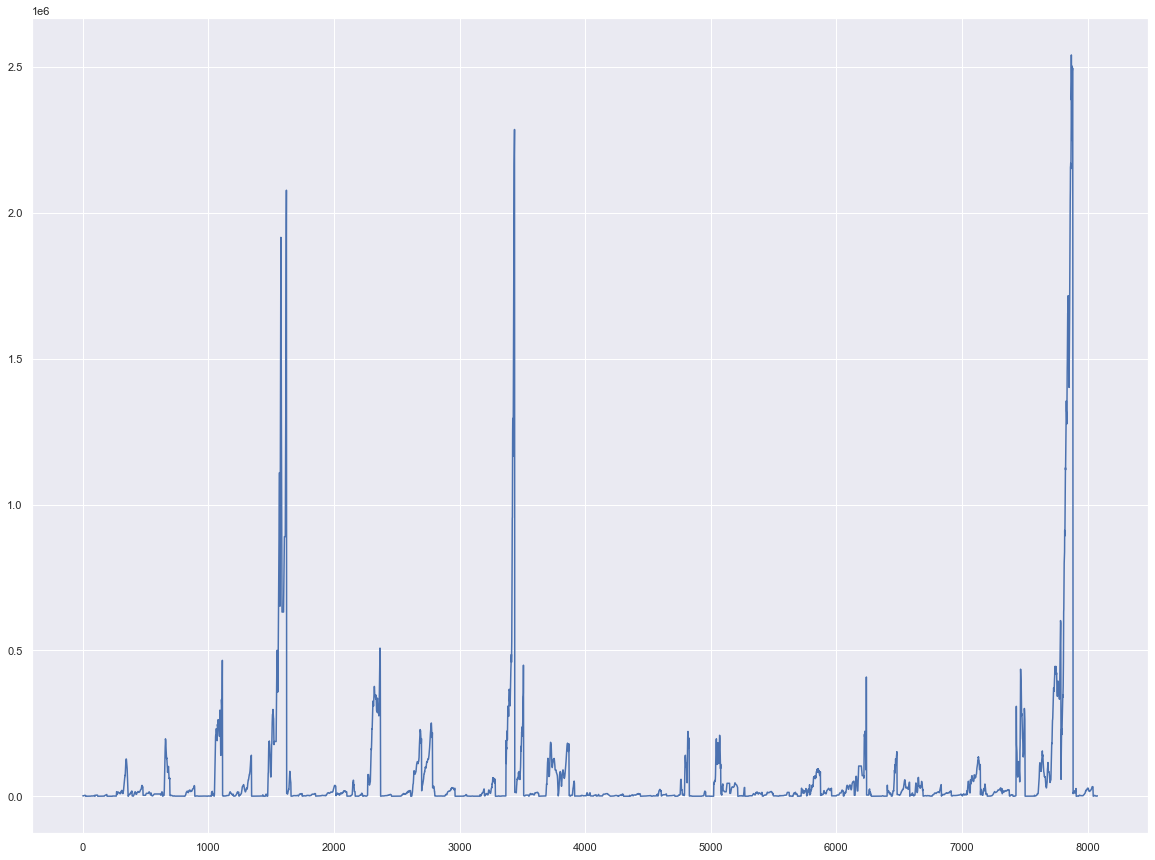

In [189]:
#nicht richtig , siehe Achsenwerte, Problem mehrere Werte pro Tag, da pro Land?
df_time["daily_vaccinations"].plot();

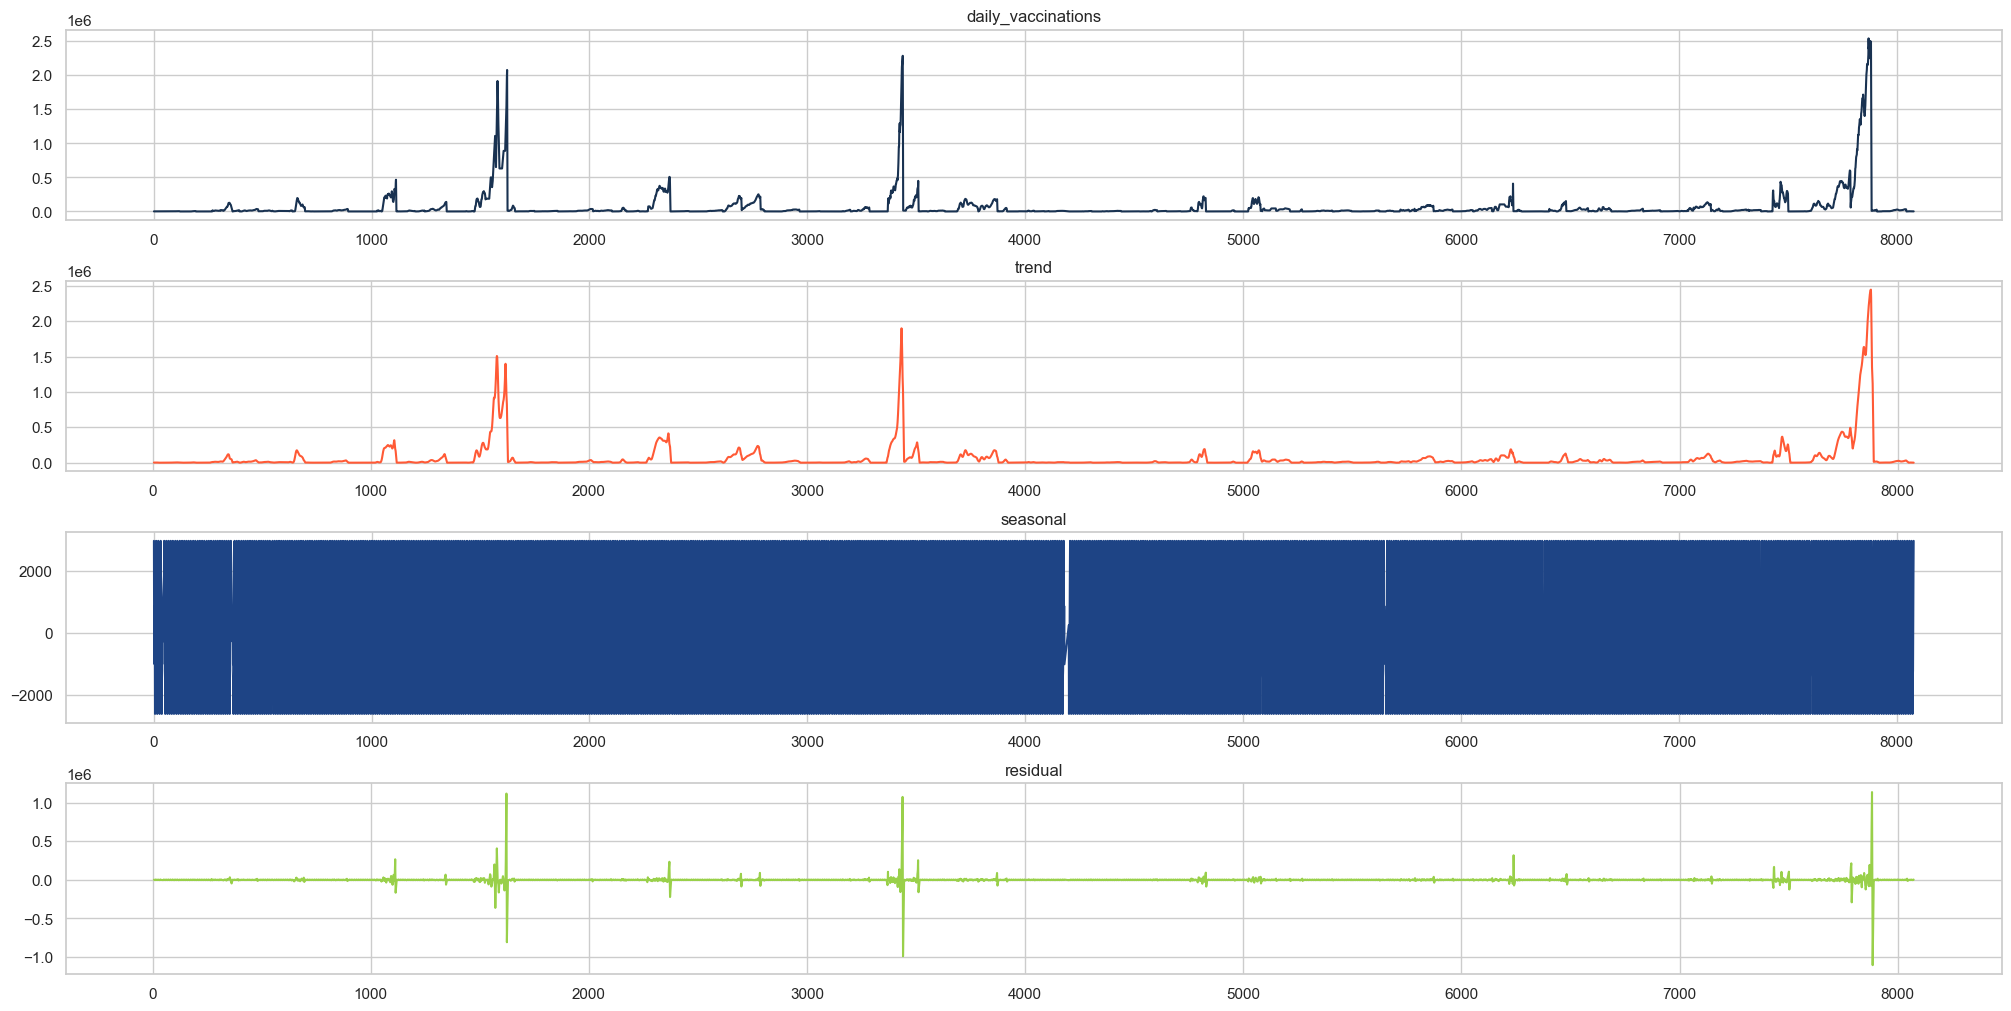

In [151]:
# Check decomposition of trend, seasonality and residue of original time series

decomposition = seasonal_decompose(x=df_time['daily_vaccinations'], period=10)# model='multiplicative',

fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)
decomposition.observed.plot(c=sns_c[0], ax=ax[0])
ax[0].set(title='daily_vaccinations')
decomposition.trend.plot(c=sns_c[1], ax=ax[1])
ax[1].set(title='trend')
decomposition.seasonal.plot(c=sns_c[2], ax=ax[2])
ax[2].set(title='seasonal')
decomposition.resid.plot(c=sns_c[3], ax=ax[3])
ax[3].set(title='residual')
fig.set_size_inches(20, 10);

xxx

## Check for Stationarity

Stationarity: A time series is stationary if its statistical properties (e.g. mean, variance, etc.) are the same throughout the series, independently of the point in time where you observe it. There are no long-term predictable patterns such as trend or seasonality. Plots will show a roughly horizontal trend with constant variance.

noch umschreiben:

In order to check for stationarity we will apply three different methods. First, we will calculate and plot the rolling mean and rolling standard deviation. It they show an upward or downward trend or vary over time, then it is highly likely that our time series is non-stationary. Furthermore, we will use the ADF (Augmented Dickey-Fuller) and the KPSS (Kwiatkowski-Phillips-Schmidt-Shintests) tests. We have to be careful when interpreting the results: the null-hypothesis of the ADF test is that the time series is non-stationary whereas the KPSS test assumes that it is stationary.

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -8.172916
p-value: 0.000000
----------------------------------------
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 0.391073
p-value: 0.081003
----------------------------------------


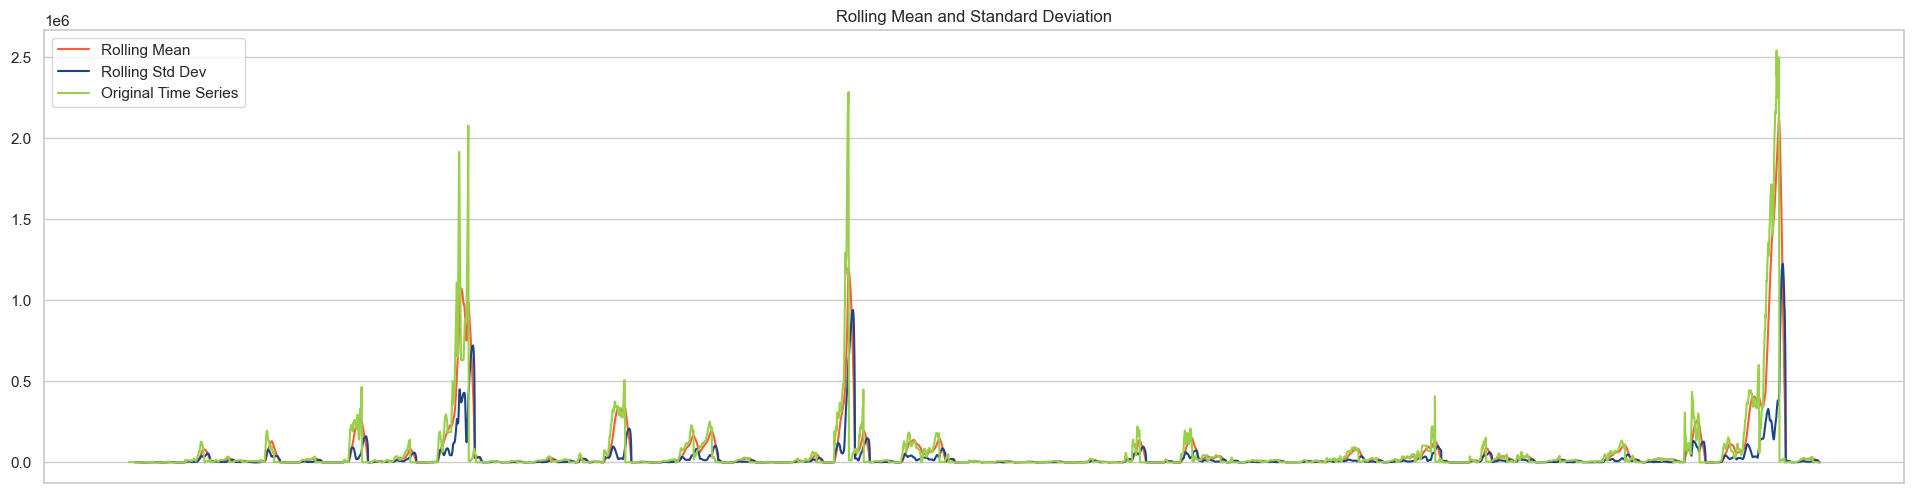

In [155]:
def stationarity_test(daily_vaccinations):
    
    # Calculate rolling mean and rolling standard deviation
    rolling_mean = daily_vaccinations.rolling(30).mean()
    rolling_std_dev = daily_vaccinations.rolling(30).std()
    
    # Plot the statistics
    plt.figure(figsize=(24,6))
    plt.plot(rolling_mean, color='#FF5A36', label='Rolling Mean')
    plt.plot(rolling_std_dev, color='#1E4485', label = 'Rolling Std Dev')
    plt.plot(daily_vaccinations, color='#99D04A',label='Original Time Series')
    plt.xticks([])
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    
    # ADF test
    print("ADF Test:")
    adf_test = adfuller(daily_vaccinations,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('----'*10)
    
    # KPSS test
    print("KPSS Test:")
    kpss_test = kpss(daily_vaccinations, regression='c', nlags="legacy", store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('----'*10)
    
stationarity_test(df_time['daily_vaccinations'])

The rolling mean moves up and down over time as as the daily vaccinations vary. The p-value of the ADF test is 0 which tells us that we can decline the null-hypothesis that the time series is non-stationary and the p-value for the KPSS test is over 0.05 which means we cannot reject this null-hypothesis that it is stationary. Both tests indicates that it is stationary.

## De-trend the Time Series -- ist das hier überhaupt nötig, eigentlich liegt ja stationarity vor?


In [157]:
# De-trending the time series
df_time['dayvacc_Detrend'] = (df_time['daily_vaccinations'] - df_time['daily_vaccinations'].shift(30))

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -11.705978
p-value: 0.000000
----------------------------------------
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 0.005790
p-value: 0.100000
----------------------------------------


/Users/birte/neuefische1/Capstone_Covid/.venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


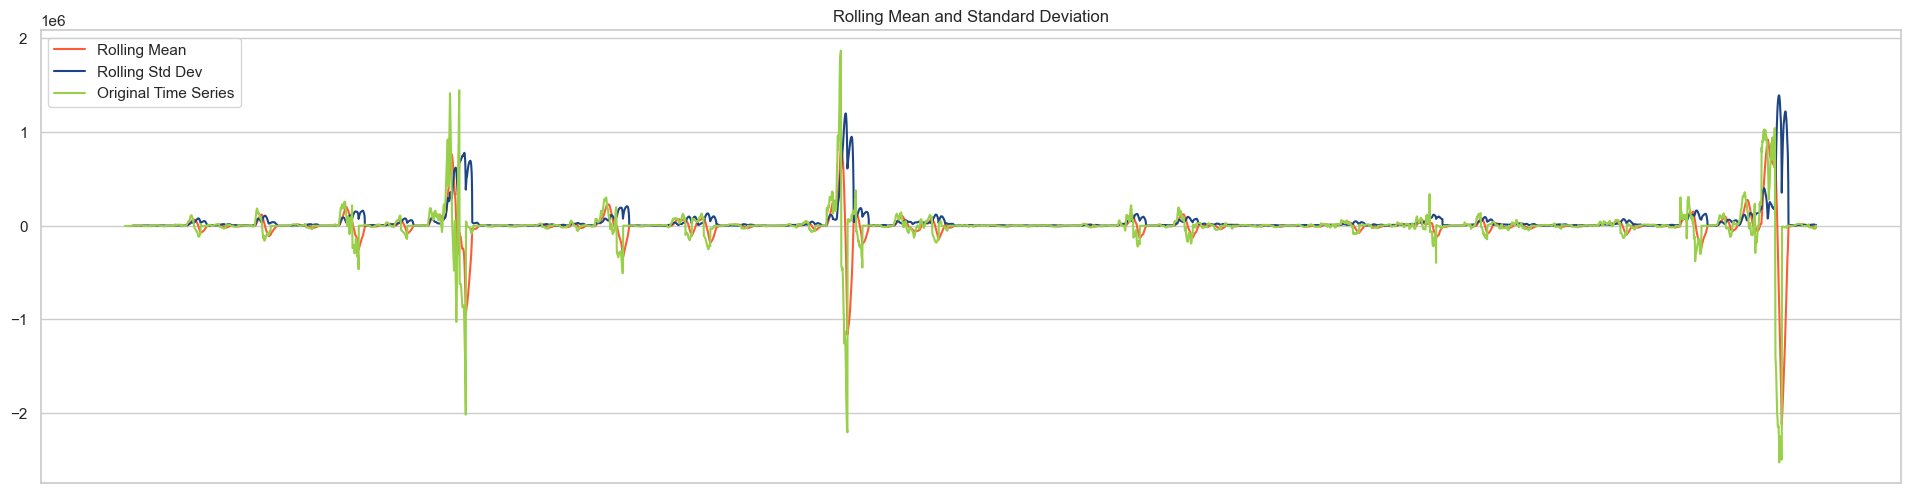

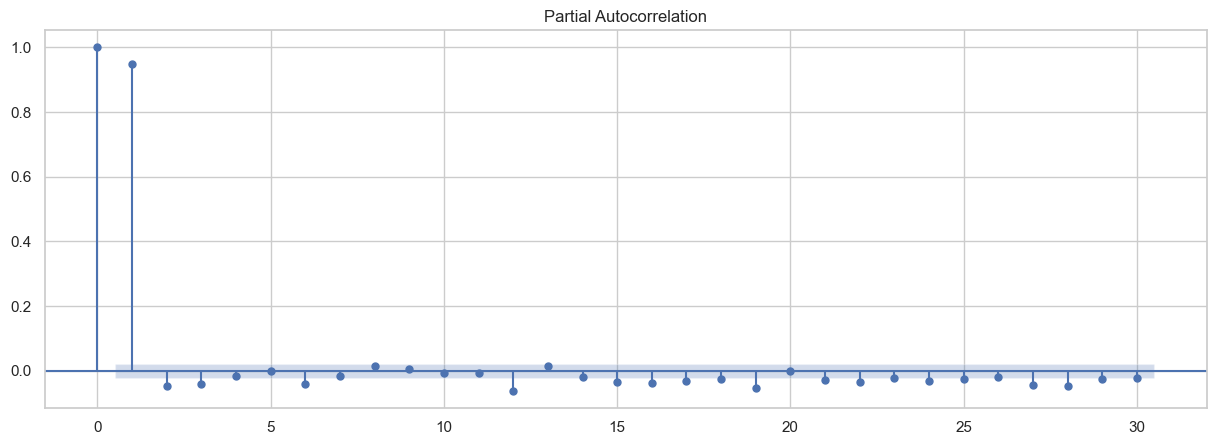

In [158]:
# Test for stationarity after de-trending 
def stationarity_test(daily_vaccinations):
    
    # Calculate rolling mean and rolling standard deviation
    rolling_mean = daily_vaccinations.rolling(30).mean()
    rolling_std_dev = daily_vaccinations.rolling(30).std()
    
    # Plot the statistics
    plt.figure(figsize=(24,6))
    plt.plot(rolling_mean, color='#FF5A36', label='Rolling Mean')
    plt.plot(rolling_std_dev, color='#1E4485', label = 'Rolling Std Dev')
    plt.plot(daily_vaccinations, color='#99D04A',label='Original Time Series')
    plt.xticks([])
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    
    # ADF test
    print("ADF Test:")
    adf_test = adfuller(daily_vaccinations,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('----'*10)
    
    # KPSS test
    print("KPSS Test:")
    kpss_test = kpss(daily_vaccinations, regression='c', nlags='legacy', store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('----'*10)
    
stationarity_test(df_time['dayvacc_Detrend'].dropna())

# Partial Autocorrelation Plot
pacf = plot_pacf(df_time['dayvacc_Detrend'].dropna(), lags=30)

Having a look at the partial autocorrelation plot suggests that correlation exists at certain lags.

In [159]:
df_time.to_csv('timeseriesformodel.csv', encoding='utf-8', index=False)

In [ ]:
#Select data for a single day:
df_daily.loc['2021-03-24']

In [ ]:
#fig, ax = plt.subplots()
#sns.lineplot(x='date', y='daily_vaccinations', data=df_daily, ax=ax)#, hue=('country' == 'Germany'
#ax.set(title='Daily Vaccinations worldwide', ylabel=r'$^\circ$C');

In [ ]:
# checking daily vaccinations for Top 10 countries:
#Selecting required columns:
cols = ['country', 'date', 'daily_vaccinations']
df_daily1 = df_daily.reset_index()
#List of top 10 countries from above:
top10_countries = ['United States', 'India', 'United Kingdom', 'Brazil', 'Indonesia', 'Turkey', 'Russia', 'Chile', 'Germany']#'China', 

# Filtering and sorting the data

daily_vacc = df_daily1[['country', 'date', 'daily_vaccinations']].sort_values(by='daily_vaccinations', ascending=True)

daily_vacc_top10 = daily_vacc[daily_vacc.country.isin(top10_countries)].dropna()

#display(daily_vacc_top10) # verifying that the filtering executed correctly

# Plotting the data in a multi faceted lineplot

#plt.figure(figsize=(18, 32))

sns.relplot(data=daily_vacc_top10, x='date', y='daily_vaccinations', hue='country', col='country', kind='line', col_wrap=2)
#sns.lineplot(data=daily_vacc_top10, x='date', y='daily_vaccinations', hue='country')
plt.xticks(rotation=90);
#plt.xticks('');

auf Zeit ab Februar - März eingrenzen?
China verzerrt - was tun?
warum hat Russland am 01.03 so einen Sprung nach unten? Sind schon so viele geimpft, wie sehen die Infektionszahlen aus?

In [ ]:
#
df_daily.loc['2021-01-01':'2021-01-31']

In [ ]:
df_daily_march = df_daily.loc['2021-03']

In [ ]:
#Daily vaccinations for March:
#fig, ax = plt.subplots()
#sns.lineplot(x='date', y='daily_vaccinations', data=df_daily_march, ax=ax)#, hue=('country' == 'Germany'
#ax.set(title='Daily Vaccinations worldwide', ylabel=r'$^\circ$C');

In [ ]:
#People vaccinated from december up to now:
#df_daily['people_vaccinated'].plot(linewidth=0.5);

In [ ]:
#Daily vaccinations worldwide:
#cols_plot = ['daily_vaccinations', 'daily_vaccinations_per_million']#'total_vaccinations'
#axes = df_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
#for ax in axes:
 #   ax.set_ylabel('Daily Vaccinations')

In [ ]:
#Daily vaccinations Europe:
#df_daily_EU_GB = df_daily[df_daily['cgrouped'] == 'Europe']
#cols_plot = ['daily_vaccinations', 'daily_vaccinations_per_million']#'total_vaccinations'
#axes = df_daily_EU_GB[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
#for ax in axes:
 #   ax.set_ylabel('Daily Vaccinations')

In [ ]:
#Daily vaccinations EU and GB:
#df_daily_EU_GB = df_daily.loc[]
#cols_plot = ['daily_vaccinations', 'daily_vaccinations_per_million']#'total_vaccinations'
#axes = df_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
#for ax in axes:
    #ax.set_ylabel('Daily Vaccinations')

In [ ]:
#Daily vaccinated from december up to now:
#df_daily['daily_vaccinations'].plot(linewidth=0.5);

In [ ]:
#Daily vaccinated from december up to now for Europe:
#df_daily_EU_GB['daily_vaccinations'].plot(linewidth=0.5, title='Number of daily vaccinations in Europe', xlabel = "Date", ylabel = 'Number of vaccinations');

In [ ]:
df_daily_EU = df_daily[df_daily['cgrouped'] == 'Europe']

In [ ]:
df_daily_EU = df_daily[df_daily['cgrouped'] == 'Europe']
UK = df_daily[df_daily['cgrouped'] == 'UK & British Oversea']
USA = df_daily[df_daily['cgrouped'] == 'USA']
Asia = df_daily[df_daily['cgrouped'] == 'Asia']


In [ ]:
#df6.sample(20)

###### 

In [ ]:
#plt.style.use('seaborn-whitegrid')
#cols_plot = ['daily_vaccinations']#'total_vaccinations', , 'daily_vaccinations_per_million'
#axes1 = df_daily_EU[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize = (8,8), subplots=True);
#axes2 = UK[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize = (8,8), subplots=True);
#axes3 = USA[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize = (8,8), subplots=True);
#axes4 = Asia[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize = (8,8), subplots=True);
#for ax in axes:
    #ax.set_ylabel('Daily Vaccinations')

In [ ]:
#Feature Engeenering for province data and longitudes/latitudes

In [ ]:
#import dataframe with country information and longitudes/latitudes
df_coordinates_wo_Province = pd.read_csv('coordinates_wo_Province.csv')

In [ ]:
df_coordinates_wo_Province.shape

In [ ]:
df2_for_merge = df2[['country', 'iso_code']].copy()

In [ ]:
#add latitude/longitude data to dataframe for worldmap plotting:


#df2_with_coordinates_wo_Province = pd.merge(df2_for_merge, df_coordinates_wo_Province, on='iso_code')#, left_on='iso_code', right_on='country'

In [ ]:

#df2_with_coordinates_concat = pd.concat([df2_for_merge, df_coordinates_wo_Province], keys='iso_code')

In [ ]:
#add latitude/longitude data to dataframe for worldmap plotting:


df2_with_coordinates_wo_Province = pd.merge(df2_for_merge, df_coordinates_wo_Province, on='iso_code', how='right')#, left_on='iso_code', right_on='country'

In [ ]:
df2_with_coordinates_wo_Province.sample(10)

In [ ]:
df2_with_coordinates_wo_Province[df2_with_coordinates_wo_Province.iso_code == 'BEL']

In [ ]:
df_coordinate_Province = pd.read_csv('coordinates.csv')
df_coordinate_Province.tail()

In [ ]:

df2_coordinates_Province = pd.merge(df2_for_merge, df_coordinate_Province, on='iso_code', how='right')

In [ ]:
df2_coordinates_Province.head()

In [ ]:
df2_coordinates_Province[df2_coordinates_Province.country_x == 'China'].head

In [ ]:
df2_coordinates_Province.shape

In [ ]:

#df2_with_coordinates_concat = pd.concat([df2_for_merge, df_coordinates_wo_Province], keys='iso_code')

In [ ]:
df2_with_coordinates_wo_Province.sample(10)

In [ ]:
df2_with_coordinates_wo_Province.sample(10)

In [ ]:
df2_with_coordinates_wo_Province[df2_with_coordinates_wo_Province.iso_code == 'DEU']

Ranking of countries based on Gross domestic product from 2019 in Millions of US dollars 
Data source: The world bank (https://www.worldbank.org/en/home)

In [ ]:
# import world bank ranking
df_ranking = pd.read_csv('data/GDP.csv')

df_ranking.tail()

In [ ]:
lst = ['Unnamed: 2', 'Unnamed: 5']
df_ranking.drop(lst, 1, inplace=True)
#df_ranking.rename(columns={'Country': 'country'},inplace=True)
df_ranking.tail()

In [ ]:
df_ranking.rename(columns={' Country': 'country', 'Iso_code': 'iso_code'},inplace=True)
df_ranking.tail()

In [ ]:
df_ranking[df_ranking.country == 'Russia']

In [ ]:
#load population data(source: "https://worldpopulationreview.com/countries"):
df_population = pd.read_csv('data/population.csv')
df_population.rename(columns={'name': 'country'},inplace=True)
df_population.head()

In [84]:
df_population.drop(['pop2020', 'GrowthRate', 'area', 'Density', 'Rank'], axis =1, inplace=True)
df_population.head()

NameError: name 'df_population' is not defined

In [85]:
df_population.sample(5)

NameError: name 'df_population' is not defined

In [ ]:
#merge dataframes to have population and GDP in one dataframe
df_population_gdp = pd.merge(df_population, df_ranking, on='country', how='left')

In [86]:
df_population_gdp

NameError: name 'df_population_gdp' is not defined

In [ ]:
is_NaN = df_population_gdp.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_population_gdp[row_has_NaN]

print(rows_with_NaN)

In [87]:
df_population_gdp[df_population_gdp.iso_code == 'NaN']

NameError: name 'df_population_gdp' is not defined

In [ ]:
missing_iso = {'Montserrat': '', 'Falkland Islands': '', 'Niue': '', 'Tokelau': '', 'Vatican City': ''}